In [1]:
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('seaborn-white')
plt.style.use('dark_background')
%matplotlib inline
from astropy.io import fits
import os
from scipy.signal import find_peaks
from rascal.calibrator import Calibrator
from rascal.util import refine_peaks

C:\Users\jtear\anaconda3\lib\site-packages\rascal\calibrator.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
fits_files = [f for f in os.listdir('Solar_Spectra//Fits') if f.endswith('.FIT')]
#for i in range(len(fits_files)):
#    print(i,' : ',fits_files[i])

In [3]:
#low resolution
low_56_HG_file = fits_files[12]
low_56_sun_file = fits_files[30]

#high resolution: object_position
HG_40 = fits_files[0]
HG_44 = fits_files[1]
HG_48 = fits_files[2]
HG_52 = fits_files[4]
HG_56 = fits_files[10]
HG_60 = fits_files[15]
HG_64 = fits_files[17]
HG_68 = fits_files[19]

sun_40 = fits_files[21]
sun_44 = fits_files[23]
sun_48 = fits_files[24]
sun_52 = fits_files[26]
sun_56 = fits_files[28]
sun_60 = fits_files[31]
sun_64 = fits_files[36]
sun_68 = fits_files[38]

HG_highres = np.array([HG_40, HG_44, HG_48, HG_52, HG_56, HG_60, HG_64, HG_68])
sun_highres = np.array([sun_40, sun_44, sun_48, sun_52, sun_56, sun_60, sun_64, sun_68])

In [4]:
def get_data(filename):
    data = fits.getdata(os.path.join('Solar_Spectra/Fits', filename))
    return data

In [5]:
def get_spectra(data, plot, L):
    cut = data[100:110, :]
    spectrum = np.average(cut, axis=0)
    x_pix = np.arange(0,765,1)
    if plot == True:
        plt.figure(figsize=(20, 10))
        plt.plot(x_pix,spectrum, label=L)
        plt.xlabel('Pixel Number',fontsize=20)
        plt.ylabel('Counts',fontsize=20)
        plt.legend(fontsize=20)
    #return spectrum

In [6]:
def get_calibrated_spectra(data, fit_coeff, plot, Label, Return):
    cut = data[100:110, :]
    spectrum = np.average(cut, axis=0)
    x_pix = np.arange(0, 765, 1)
    L = fit_coeff[1]*x_pix + fit_coeff[0]
    if plot == True:
        plt.figure(figsize=(20, 10))
        plt.plot(L, spectrum,label=Label)
        plt.xlabel('Wavelength (Angstroms)', fontsize=20)
        plt.ylabel('Counts', fontsize=20)
        plt.legend(fontsize=20)
        
    if Return==True:
        return L, spectrum

In [7]:
def get_spectra1(data):
    cut = data[100:110, :]
    spectrum = np.average(cut, axis=0)
    return spectrum

In [8]:
def get_peaks(HG_file, sun_file, Label, sun_label,L_min,L_max):
    get_spectra(get_data(HG_file), True, Label)
    plt.grid()
    plt.show()
    spectrum = get_spectra1(get_data(HG_file))
    peaks, _ = find_peaks(spectrum)
    peaks_refined = refine_peaks(spectrum, peaks)
    c = Calibrator(peaks_refined, spectrum)
    c.set_calibrator_properties(num_pix=len(spectrum),
                                plotting_library='matplotlib',
                                log_level='info')
    #c.plot_arc()
    c.set_hough_properties(num_slopes=10000, xbins=50, ybins=50, min_wavelength=L_min,
                           max_wavelength=L_max, range_tolerance=500., linearity_tolerance=50)

    c.set_ransac_properties(sample_size=5, top_n_candidate=8)
    c.add_atlas(["Hg"])
    c.do_hough_transform()
    fit_coeff, matched_peaks, matched_atlas, rms, residual, peak_utilisation, atlas_utilisation = c.fit(
    fit_deg=1)
    c.plot_fit(fit_coeff, spectrum, plot_atlas=False, display=False, save_fig=False)
    print("fit coefficients = ", fit_coeff)
    print("spectrum shape = ", spectrum.shape)
    
    plt.figure()
    get_calibrated_spectra(get_data(HG_file), fit_coeff, True, Label, True)
    plt.grid()
    plt.show()
    plt.savefig(Label)
    
    
    plt.figure()
    get_calibrated_spectra(get_data(sun_file), fit_coeff, True, sun_label, True)
    plt.grid()
    plt.show()
    plt.savefig(sun_label)
    #return fit_coeff

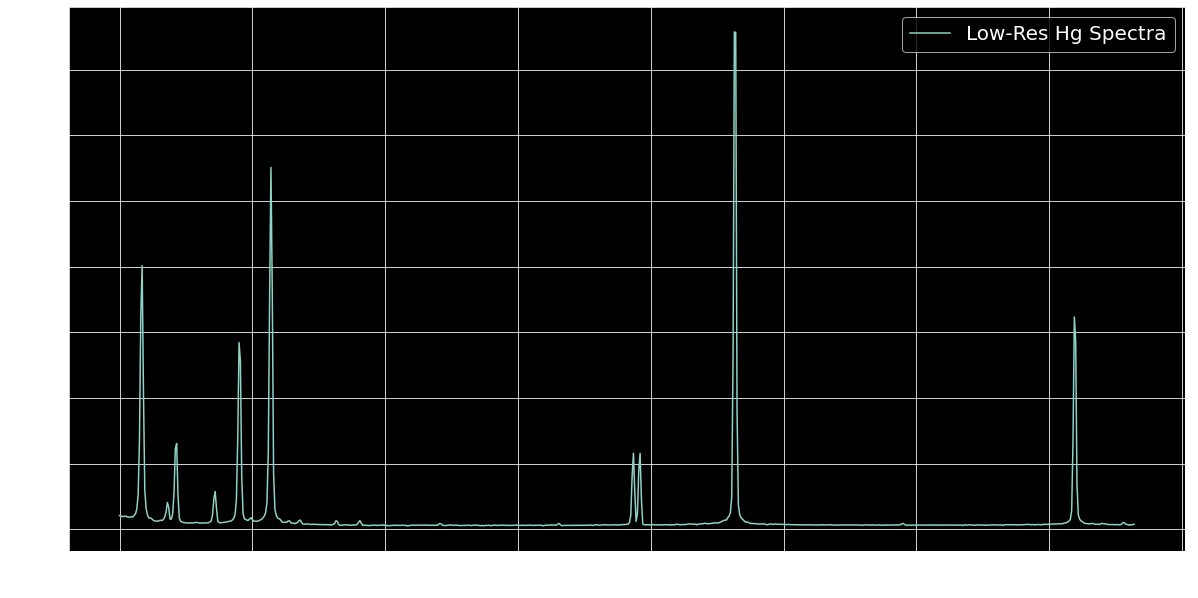

C:\Users\jtear\anaconda3\lib\site-packages\scipy\optimize\_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
[Sun, 04 Jun 2023 21:24:58] INFO [calibrator.py:997] num_pix is set to 765.
[Sun, 04 Jun 2023 21:24:58] INFO [calibrator.py:1012] pixel_list is set to None.
[Sun, 04 Jun 2023 21:24:58] INFO [calibrator.py:1045] Plotting with matplotlib.
[Sun, 04 Jun 2023 21:24:58] WARNING [calibrator.py:1428] Using add_atlas is now deprecated. Please use the new Atlas class.


  0%|          | 0/500 [00:00<?, ?it/s]

[Sun, 04 Jun 2023 21:25:06] INFO [calibrator.py:803] Found: 8
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:845] Peak at: 3663.2264819815223 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:849] - matched to 3663.2264819815223 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:845] Peak at: 3801.5988415901684 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:849] - matched to 3801.5988415901684 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:845] Peak at: 3901.8067338464857 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:849] - matched to 3901.8067338464857 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:845] Peak at: 5675.718217297454 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:849] - matched to 5675.718217297454 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:845] Peak at: 8163.23192045556 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:849] - matched to 8163.23192045556 A
[Sun, 04 Jun 2023 21:25:06] INFO [plotting.py:845] Peak at: 8783.554941032588 A
[Sun, 04 Jun 2023 21:25:06] INFO [

fit coefficients =  [2221.59283281   21.80402129]
spectrum shape =  (765,)


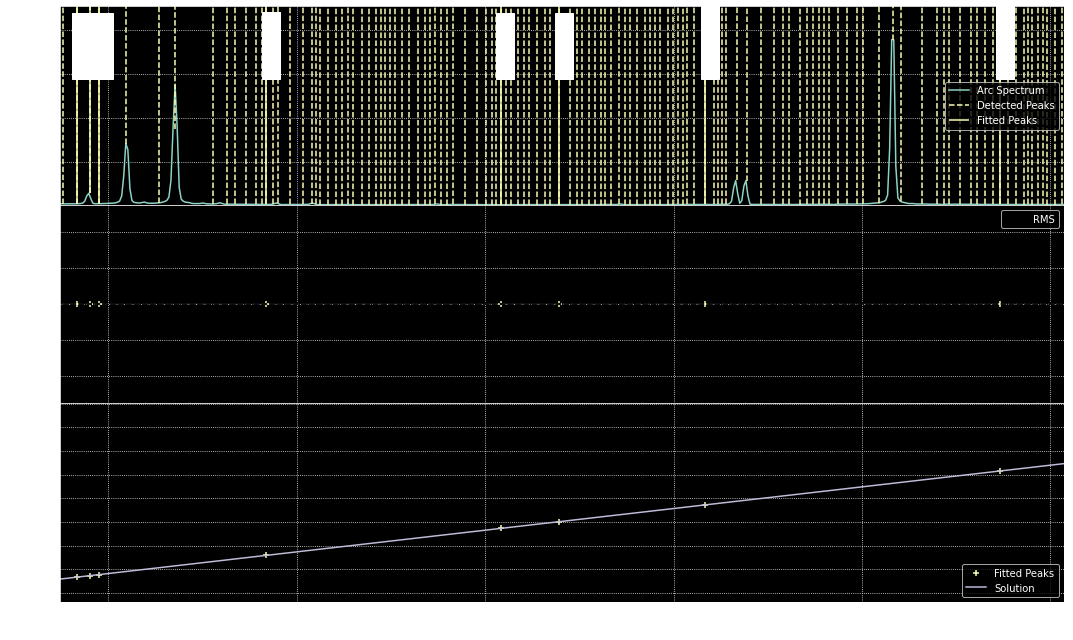

<Figure size 432x288 with 0 Axes>

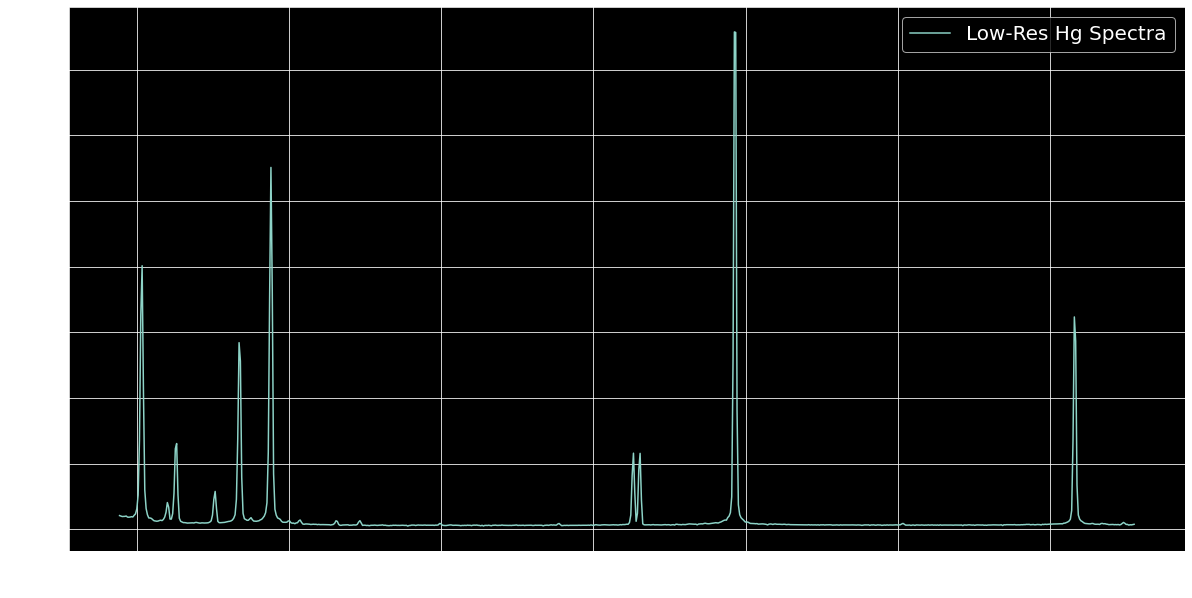

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

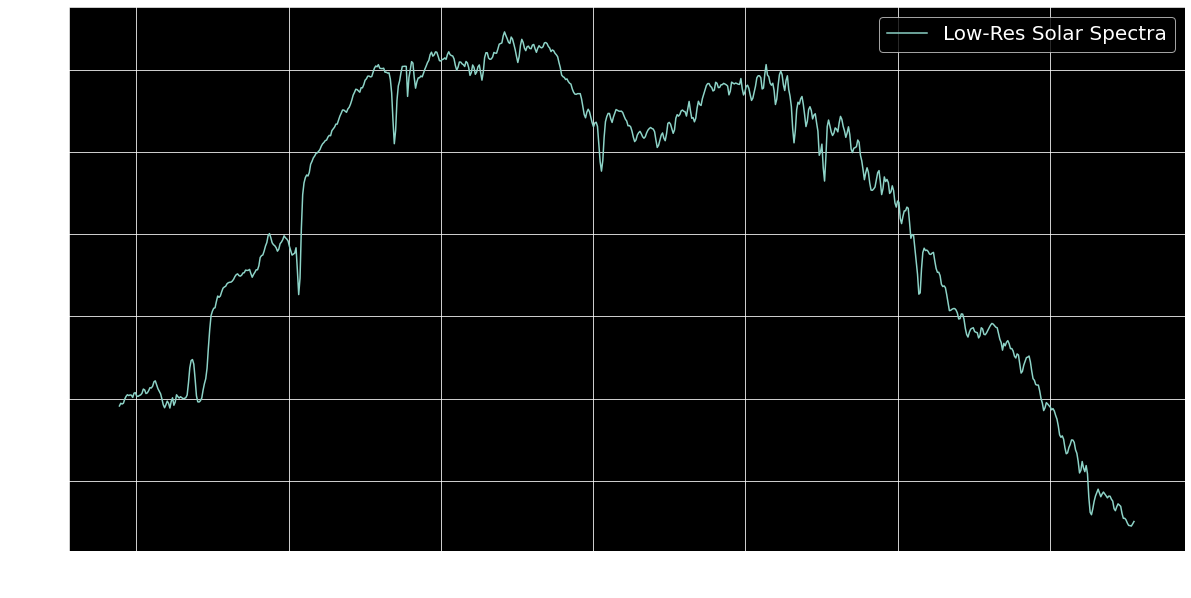

<Figure size 432x288 with 0 Axes>

In [9]:
get_peaks(low_56_HG_file, low_56_sun_file, "Low-Res Hg Spectra",
          "Low-Res Solar Spectra", 2500, 19000)

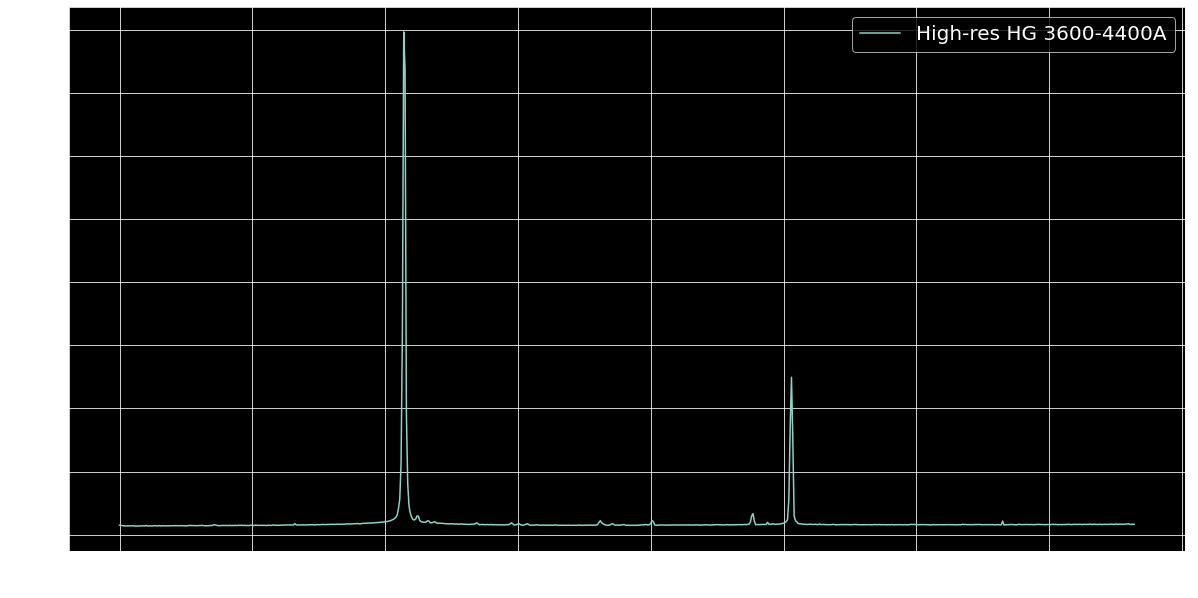

[Sun, 04 Jun 2023 21:25:07] INFO [calibrator.py:997] num_pix is set to 765.
[Sun, 04 Jun 2023 21:25:07] INFO [calibrator.py:1012] pixel_list is set to None.
[Sun, 04 Jun 2023 21:25:07] INFO [calibrator.py:1045] Plotting with matplotlib.
[Sun, 04 Jun 2023 21:25:07] WARNING [calibrator.py:1428] Using add_atlas is now deprecated. Please use the new Atlas class.


  0%|          | 0/500 [00:00<?, ?it/s]

[Sun, 04 Jun 2023 21:25:11] INFO [calibrator.py:803] Found: 11
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:845] Peak at: 3650.1006620466824 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:849] - matched to 3650.1006620466824 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:845] Peak at: 3654.784684677389 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:849] - matched to 3654.784684677389 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:845] Peak at: 3662.829490286055 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:849] - matched to 3662.829490286055 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:845] Peak at: 3663.2264819815223 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:849] - matched to 3663.2264819815223 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:845] Peak at: 3701.38366502062 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:849] - matched to 3701.38366502062 A
[Sun, 04 Jun 2023 21:25:11] INFO [plotting.py:845] Peak at: 3789.9444353667695 A
[Sun, 04 Jun 2023 21:25:11] INFO [

fit coefficients =  [3.64021896e+03 3.47224764e-01]
spectrum shape =  (765,)


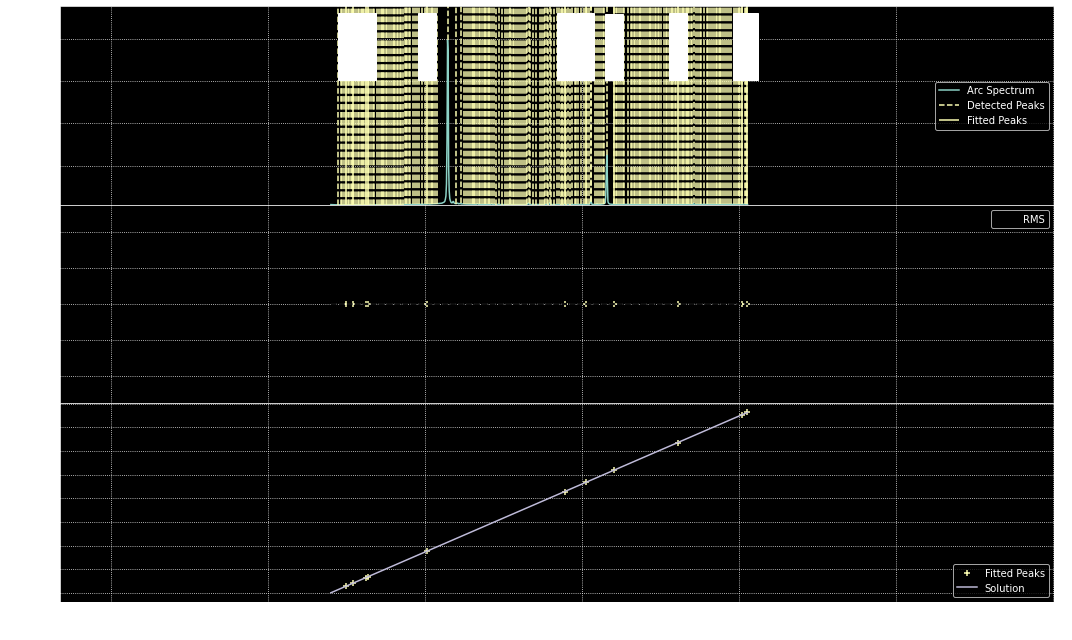

<Figure size 432x288 with 0 Axes>

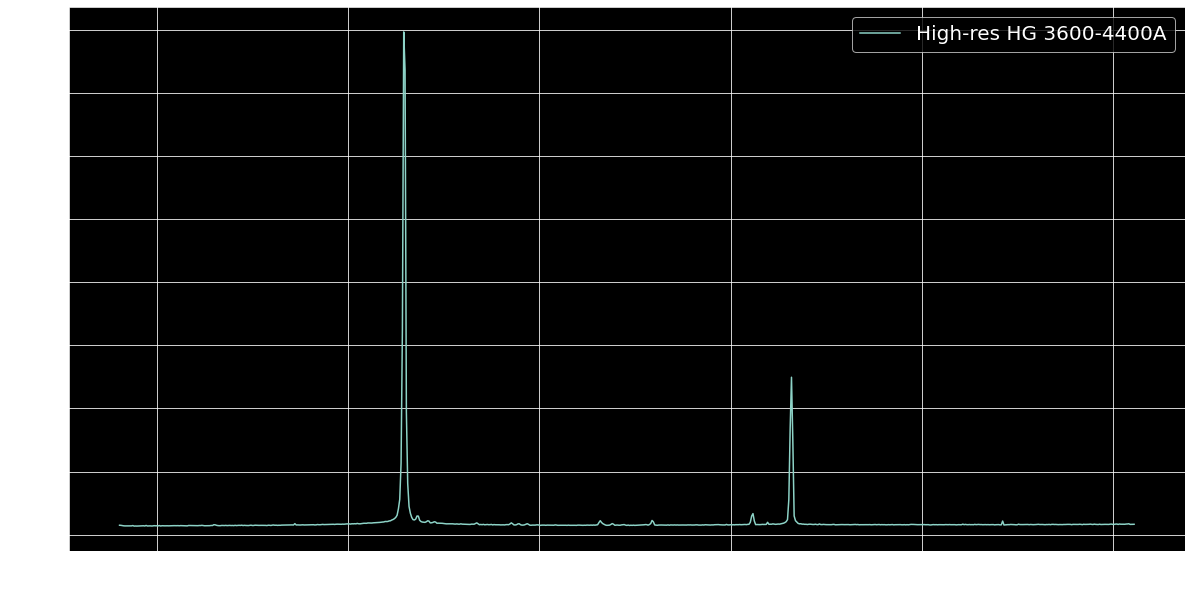

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

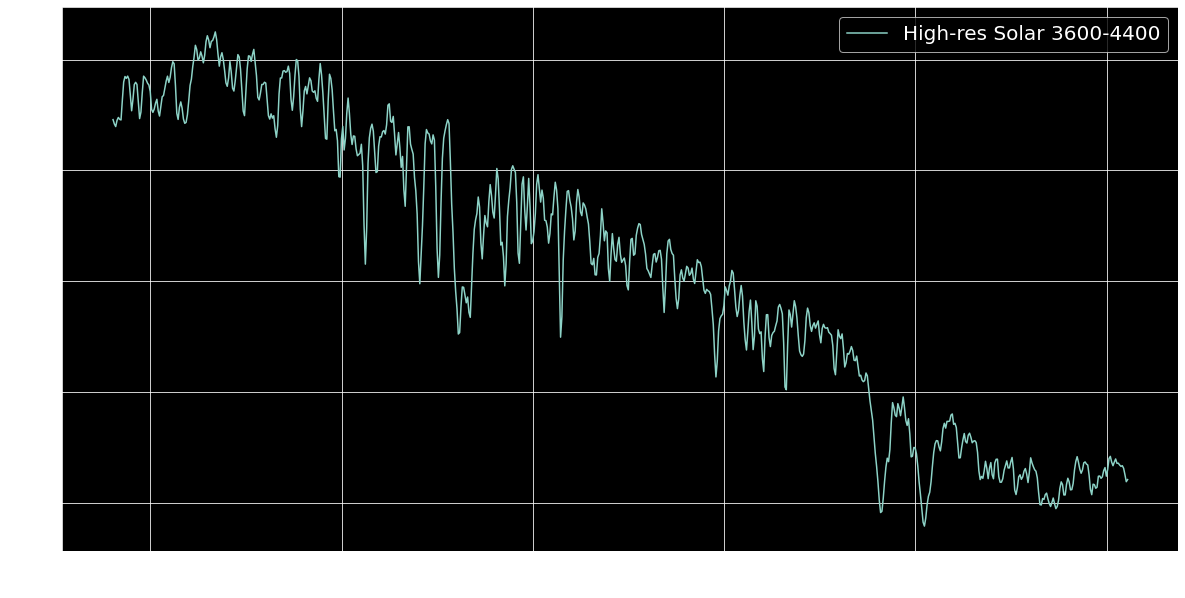

<Figure size 432x288 with 0 Axes>

In [10]:
get_peaks(HG_highres[0], sun_highres[0], "High-res HG 3600-4400A",
          "High-res Solar 3600-4400", 3600, 4400)

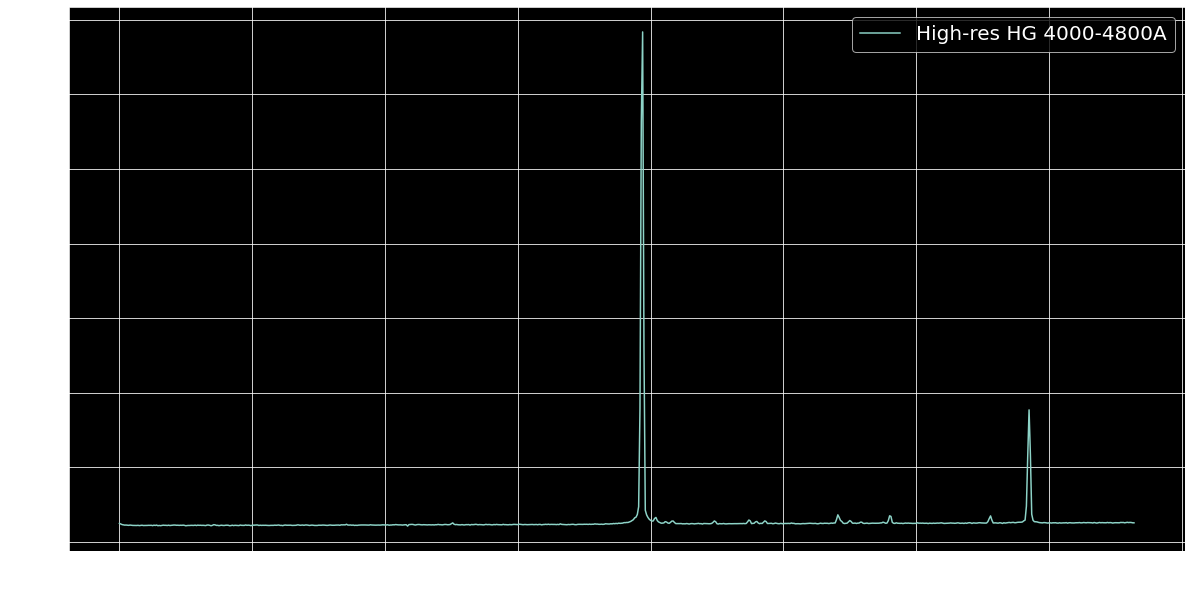

[Sun, 04 Jun 2023 21:25:13] INFO [calibrator.py:997] num_pix is set to 765.
[Sun, 04 Jun 2023 21:25:13] INFO [calibrator.py:1012] pixel_list is set to None.
[Sun, 04 Jun 2023 21:25:13] INFO [calibrator.py:1045] Plotting with matplotlib.
[Sun, 04 Jun 2023 21:25:13] WARNING [calibrator.py:1428] Using add_atlas is now deprecated. Please use the new Atlas class.


  0%|          | 0/500 [00:00<?, ?it/s]

[Sun, 04 Jun 2023 21:25:16] INFO [calibrator.py:803] Found: 14
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:845] Peak at: 3650.1006620466824 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:849] - matched to 3650.1006620466824 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:845] Peak at: 3662.829490286055 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:849] - matched to 3662.829490286055 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:845] Peak at: 3701.38366502062 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:849] - matched to 3701.38366502062 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:845] Peak at: 3789.9444353667695 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:849] - matched to 3789.9444353667695 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:845] Peak at: 3801.5988415901684 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:849] - matched to 3801.5988415901684 A
[Sun, 04 Jun 2023 21:25:16] INFO [plotting.py:845] Peak at: 3820.3361043870536 A
[Sun, 04 Jun 2023 21:25:16] INFO

fit coefficients =  [3.60535277e+03 9.71806086e-01]
spectrum shape =  (765,)


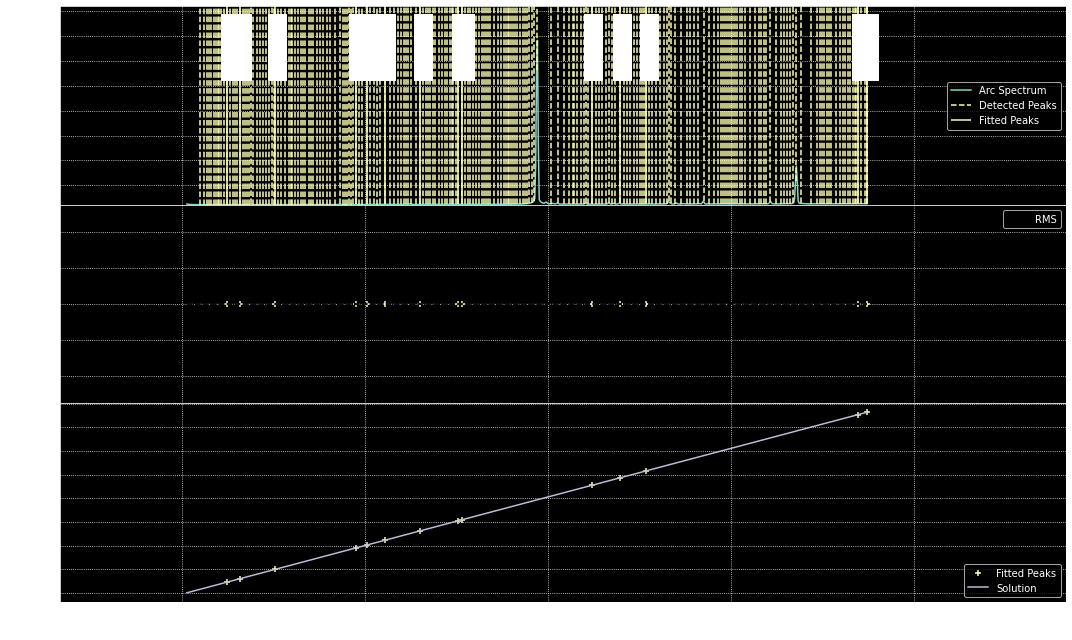

<Figure size 432x288 with 0 Axes>

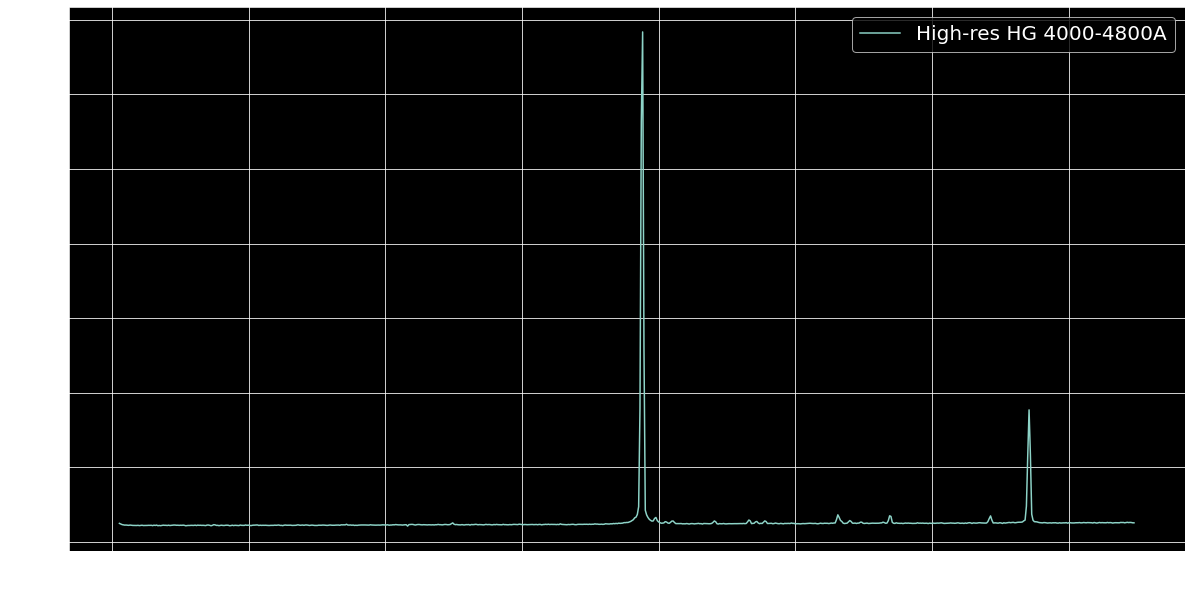

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

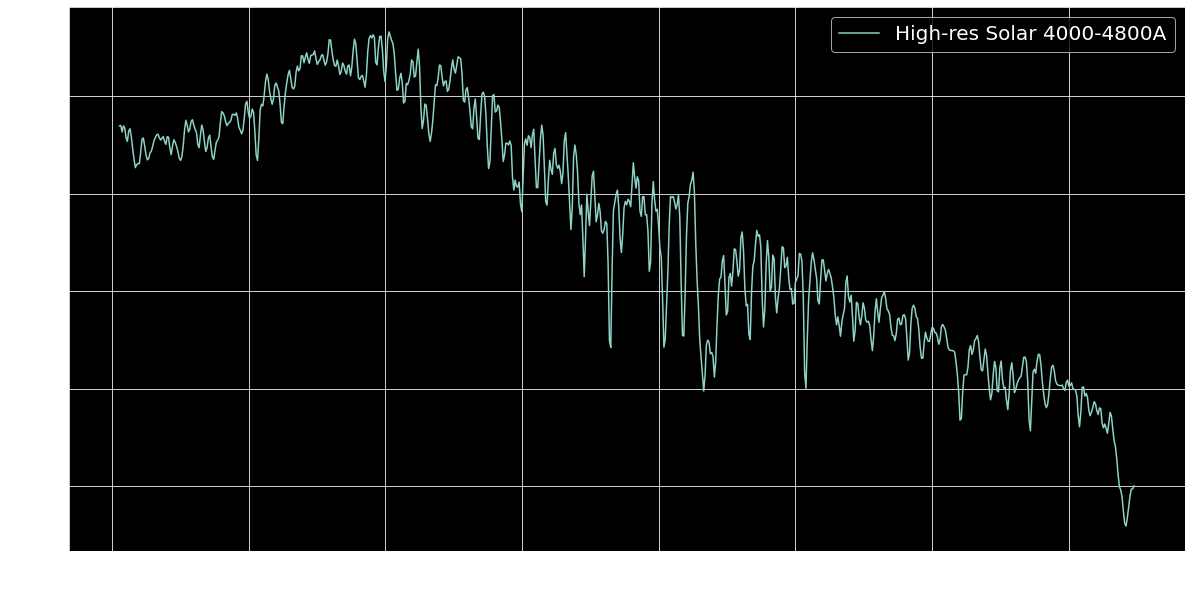

<Figure size 432x288 with 0 Axes>

In [11]:
get_peaks(HG_highres[1], sun_highres[1], "High-res HG 4000-4800A",
          "High-res Solar 4000-4800A", 4000, 4800)

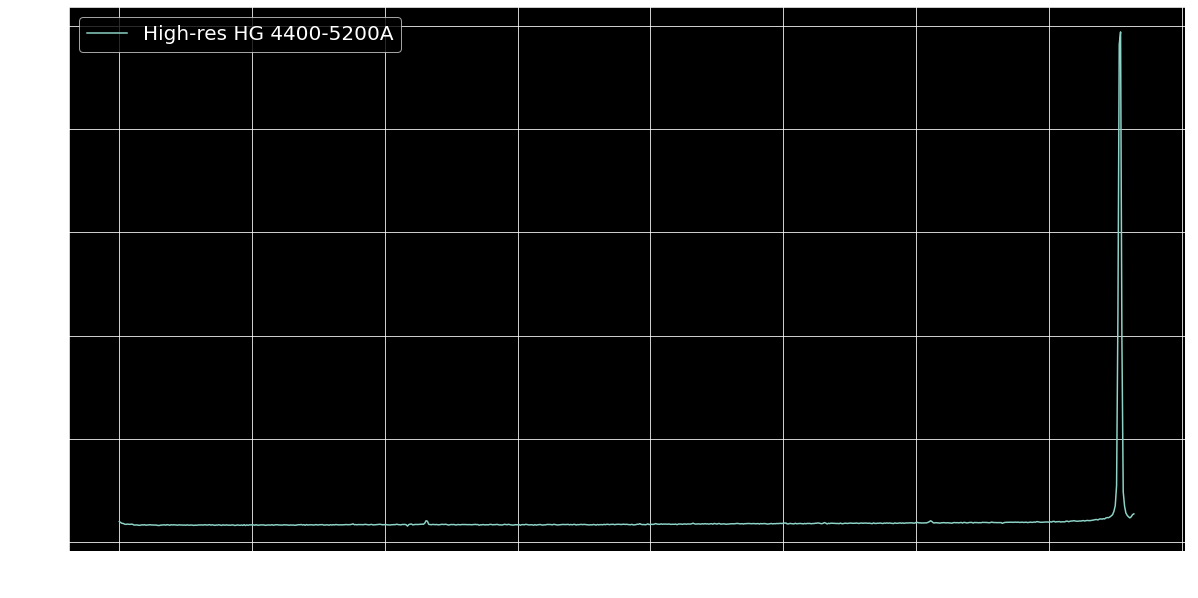

[Sun, 04 Jun 2023 21:25:18] INFO [calibrator.py:997] num_pix is set to 765.
[Sun, 04 Jun 2023 21:25:18] INFO [calibrator.py:1012] pixel_list is set to None.
[Sun, 04 Jun 2023 21:25:18] INFO [calibrator.py:1045] Plotting with matplotlib.
[Sun, 04 Jun 2023 21:25:18] WARNING [calibrator.py:1428] Using add_atlas is now deprecated. Please use the new Atlas class.


  0%|          | 0/500 [00:00<?, ?it/s]

[Sun, 04 Jun 2023 21:25:22] INFO [calibrator.py:803] Found: 11
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:845] Peak at: 4915.991895873747 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:849] - matched to 4915.991895873747 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:845] Peak at: 4960.019557771088 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:849] - matched to 4960.019557771088 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:845] Peak at: 5102.626551392959 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:849] - matched to 5102.626551392959 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:845] Peak at: 5120.5585164078275 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:849] - matched to 5120.5585164078275 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:845] Peak at: 5137.860657366175 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:849] - matched to 5137.860657366175 A
[Sun, 04 Jun 2023 21:25:22] INFO [plotting.py:845] Peak at: 5290.658709536634 A
[Sun, 04 Jun 2023 21:25:22] INFO [p

fit coefficients =  [4.86540730e+03 9.11604923e-01]
spectrum shape =  (765,)


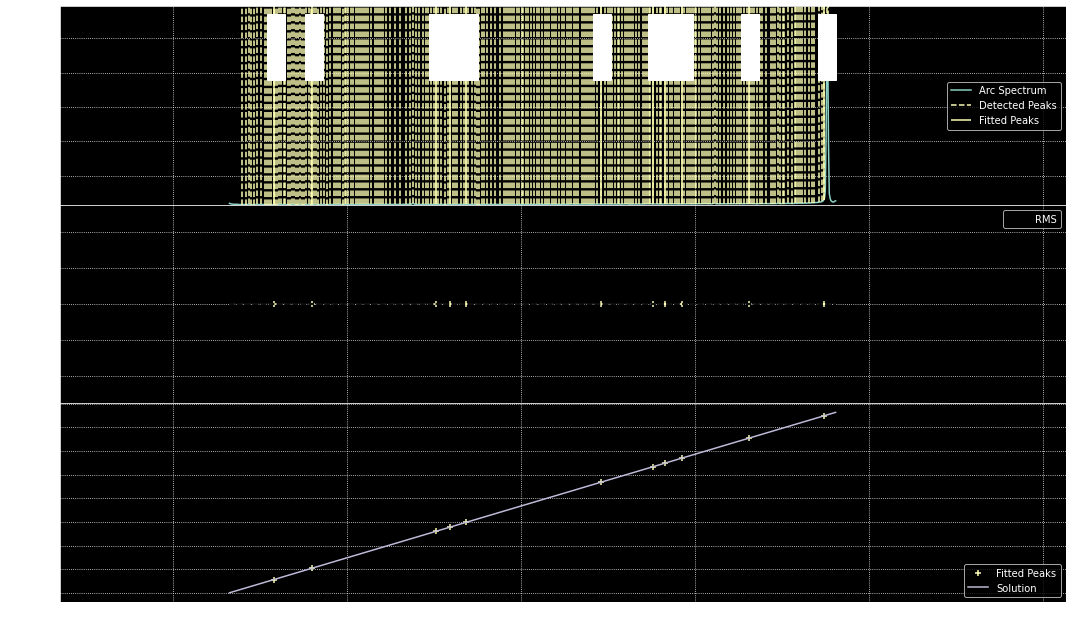

<Figure size 432x288 with 0 Axes>

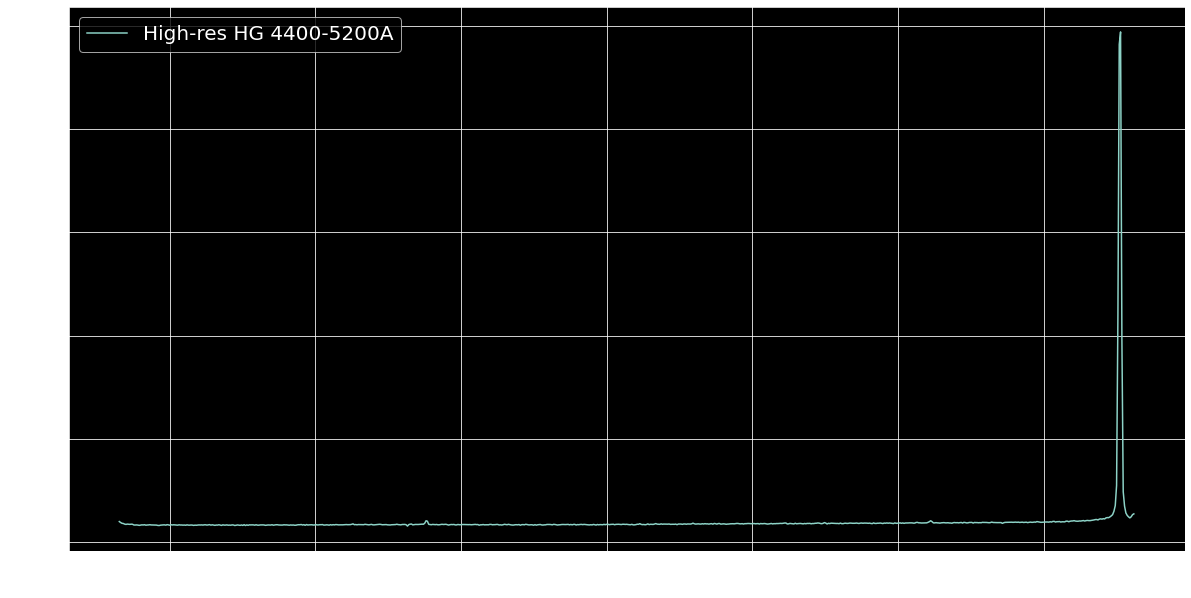

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

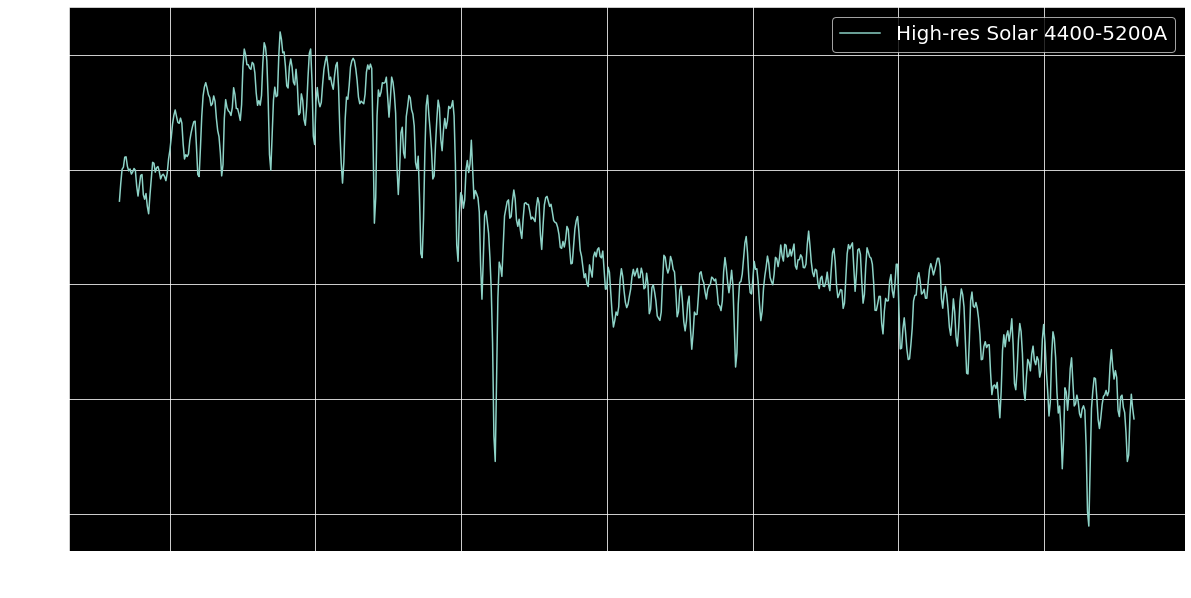

<Figure size 432x288 with 0 Axes>

In [12]:
get_peaks(HG_highres[2], sun_highres[2], "High-res HG 4400-5200A",
          "High-res Solar 4400-5200A", 4400, 5200)

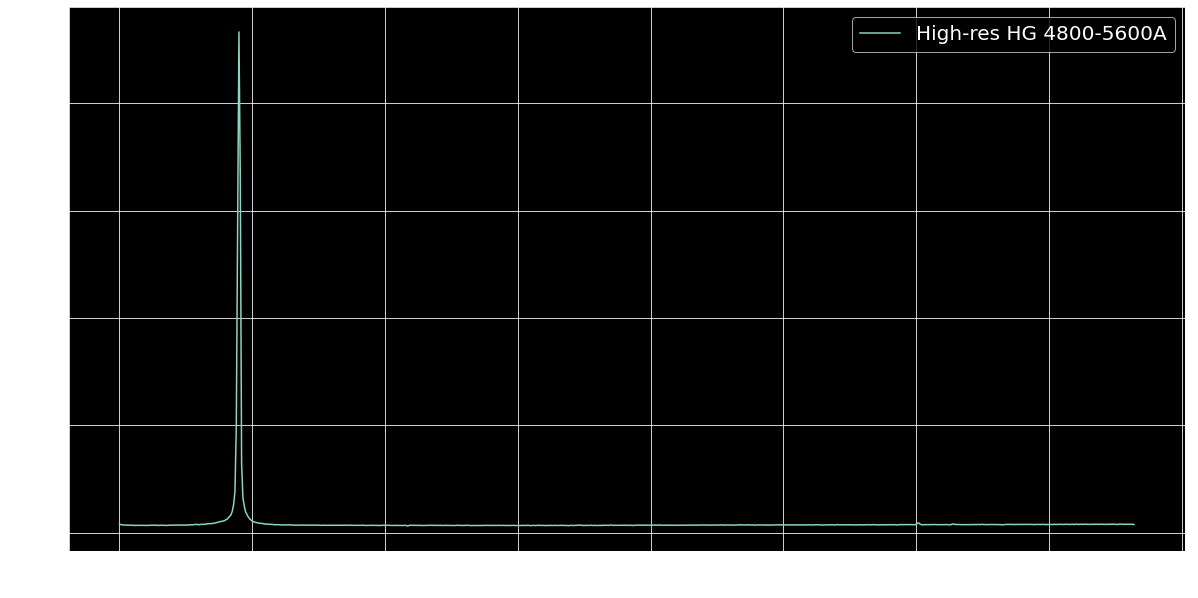

[Sun, 04 Jun 2023 21:25:23] INFO [calibrator.py:997] num_pix is set to 765.
[Sun, 04 Jun 2023 21:25:23] INFO [calibrator.py:1012] pixel_list is set to None.
[Sun, 04 Jun 2023 21:25:23] INFO [calibrator.py:1045] Plotting with matplotlib.
[Sun, 04 Jun 2023 21:25:23] WARNING [calibrator.py:1428] Using add_atlas is now deprecated. Please use the new Atlas class.


  0%|          | 0/500 [00:00<?, ?it/s]

[Sun, 04 Jun 2023 21:25:27] INFO [calibrator.py:803] Found: 17
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:845] Peak at: 5102.626551392959 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:849] - matched to 5102.626551392959 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:845] Peak at: 5120.5585164078275 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:849] - matched to 5120.5585164078275 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:845] Peak at: 5137.860657366175 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:849] - matched to 5137.860657366175 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:845] Peak at: 5290.658709536634 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:849] - matched to 5290.658709536634 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:845] Peak at: 5353.951900926523 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:849] - matched to 5353.951900926523 A
[Sun, 04 Jun 2023 21:25:27] INFO [plotting.py:845] Peak at: 5365.415674300539 A
[Sun, 04 Jun 2023 21:25:27] INFO [p

fit coefficients =  [5.03676624e+03 1.37000007e+00]
spectrum shape =  (765,)


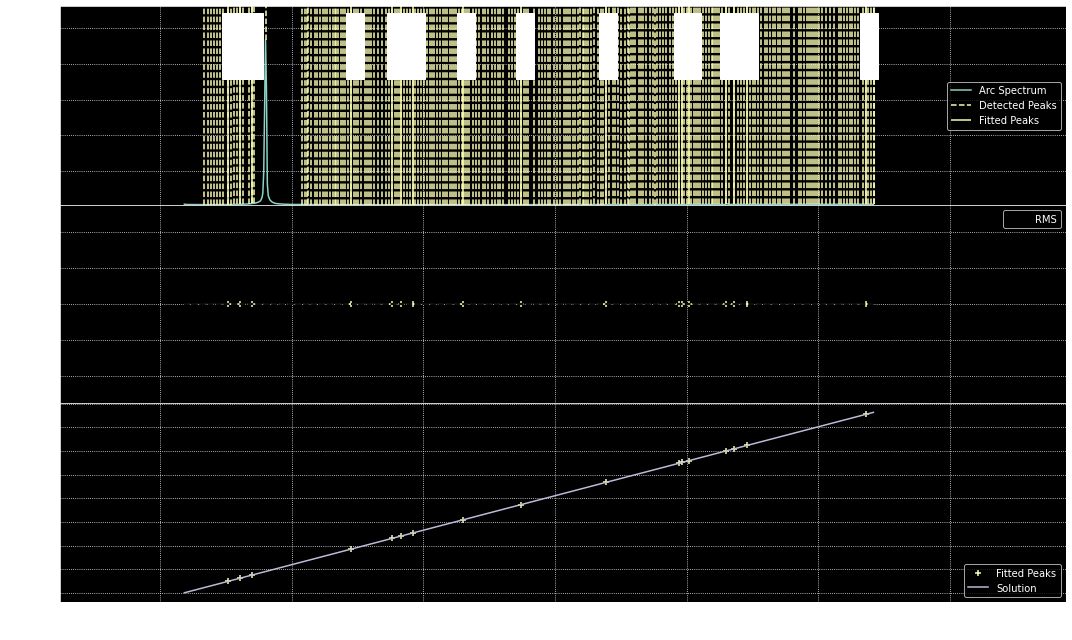

<Figure size 432x288 with 0 Axes>

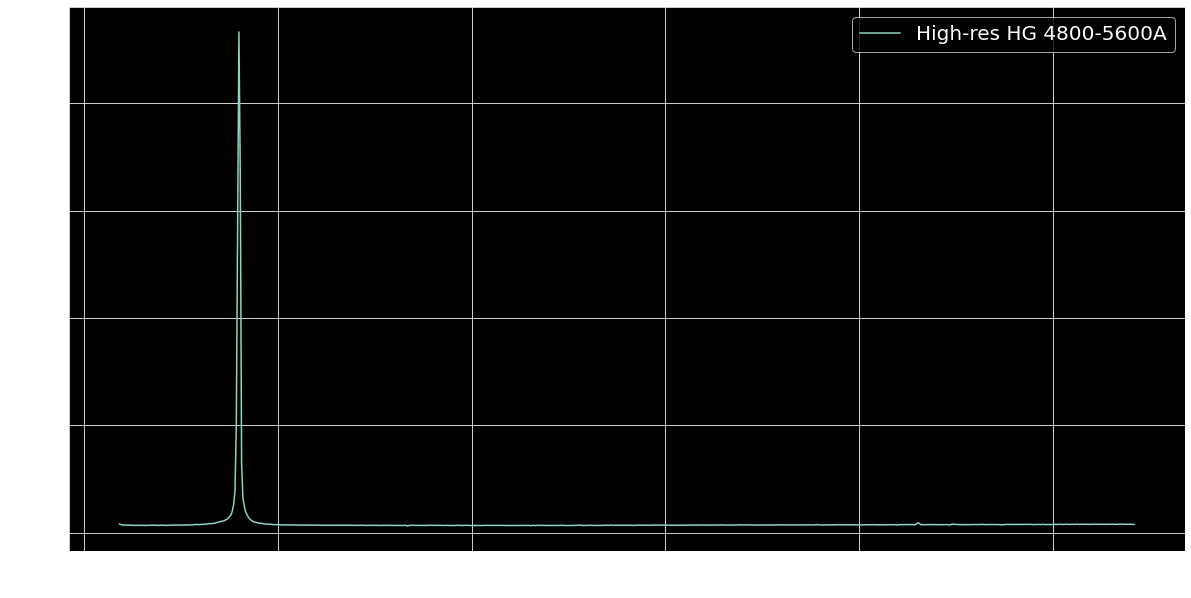

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

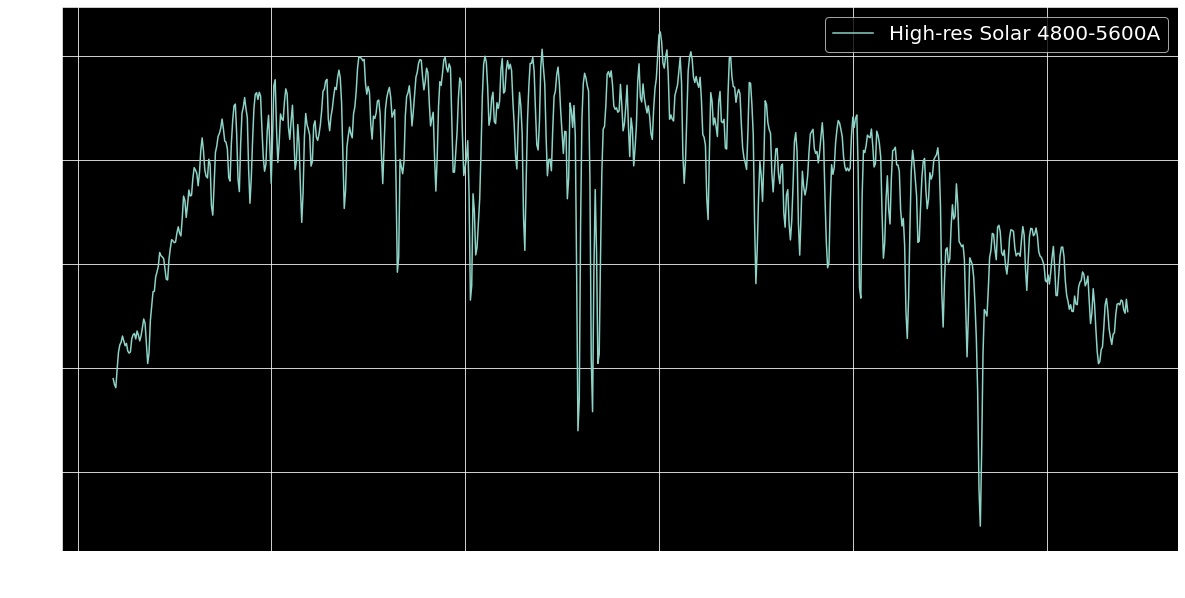

<Figure size 432x288 with 0 Axes>

In [13]:
get_peaks(HG_highres[3], sun_highres[3], "High-res HG 4800-5600A",
          "High-res Solar 4800-5600A", 4800, 5600)

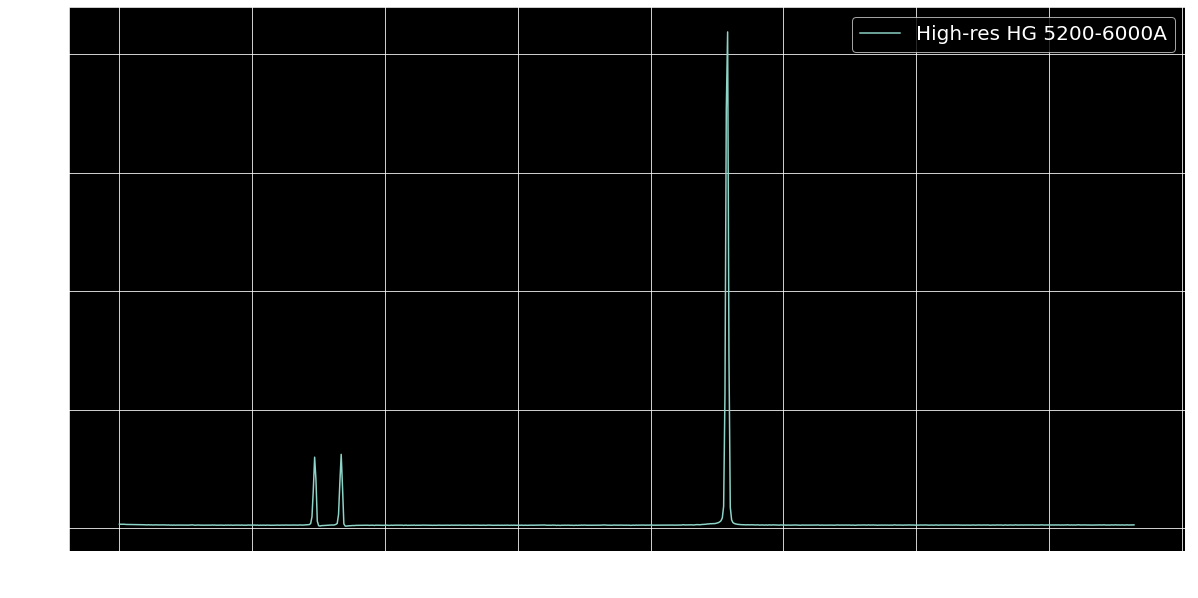

[Sun, 04 Jun 2023 21:25:29] INFO [calibrator.py:997] num_pix is set to 765.
[Sun, 04 Jun 2023 21:25:29] INFO [calibrator.py:1012] pixel_list is set to None.
[Sun, 04 Jun 2023 21:25:29] INFO [calibrator.py:1045] Plotting with matplotlib.
[Sun, 04 Jun 2023 21:25:29] WARNING [calibrator.py:1428] Using add_atlas is now deprecated. Please use the new Atlas class.


  0%|          | 0/500 [00:00<?, ?it/s]

[Sun, 04 Jun 2023 21:25:33] INFO [calibrator.py:803] Found: 17
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:845] Peak at: 5102.626551392959 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:849] - matched to 5102.626551392959 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:845] Peak at: 5120.5585164078275 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:849] - matched to 5120.5585164078275 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:845] Peak at: 5137.860657366175 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:849] - matched to 5137.860657366175 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:845] Peak at: 5290.658709536634 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:849] - matched to 5290.658709536634 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:845] Peak at: 5353.951900926523 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:849] - matched to 5353.951900926523 A
[Sun, 04 Jun 2023 21:25:33] INFO [plotting.py:845] Peak at: 5365.415674300539 A
[Sun, 04 Jun 2023 21:25:33] INFO [p

fit coefficients =  [5.06159686e+03 1.24340873e+00]
spectrum shape =  (765,)


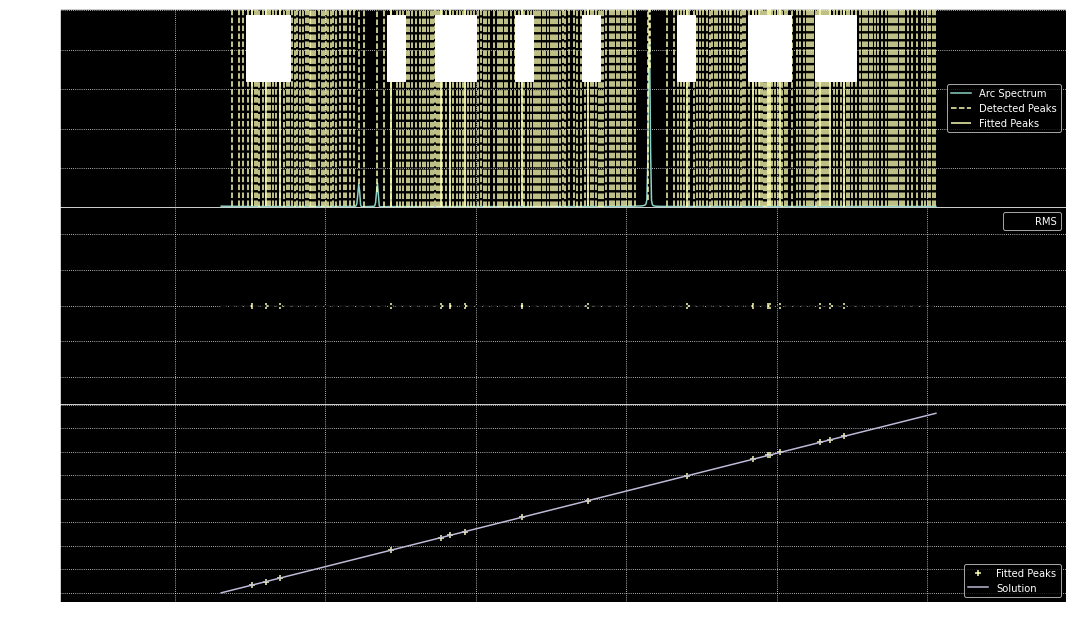

<Figure size 432x288 with 0 Axes>

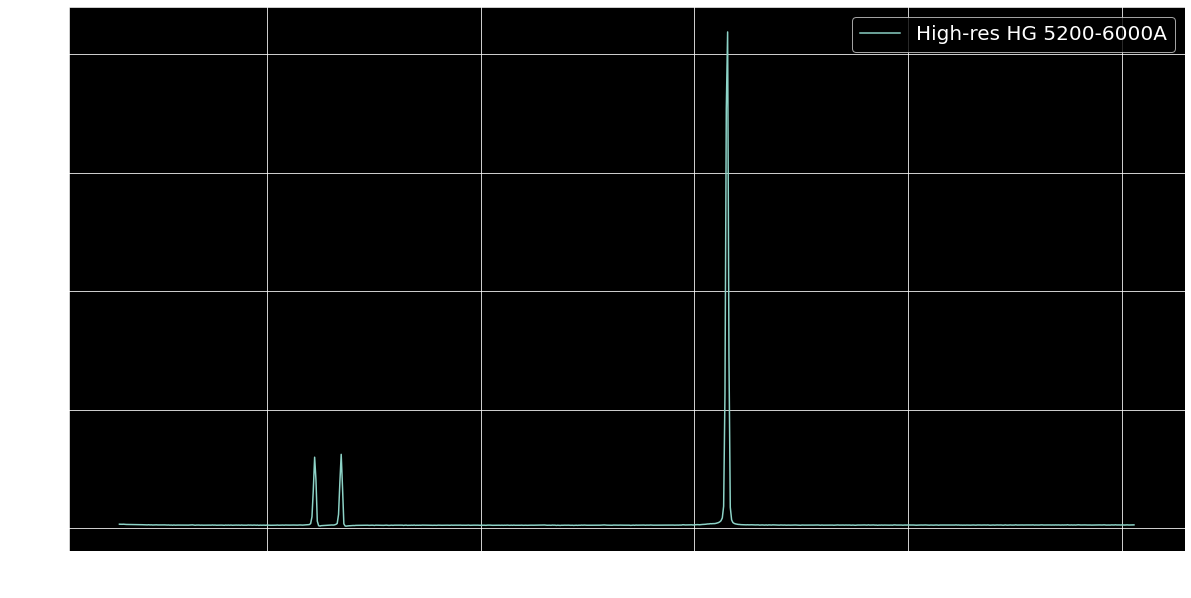

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

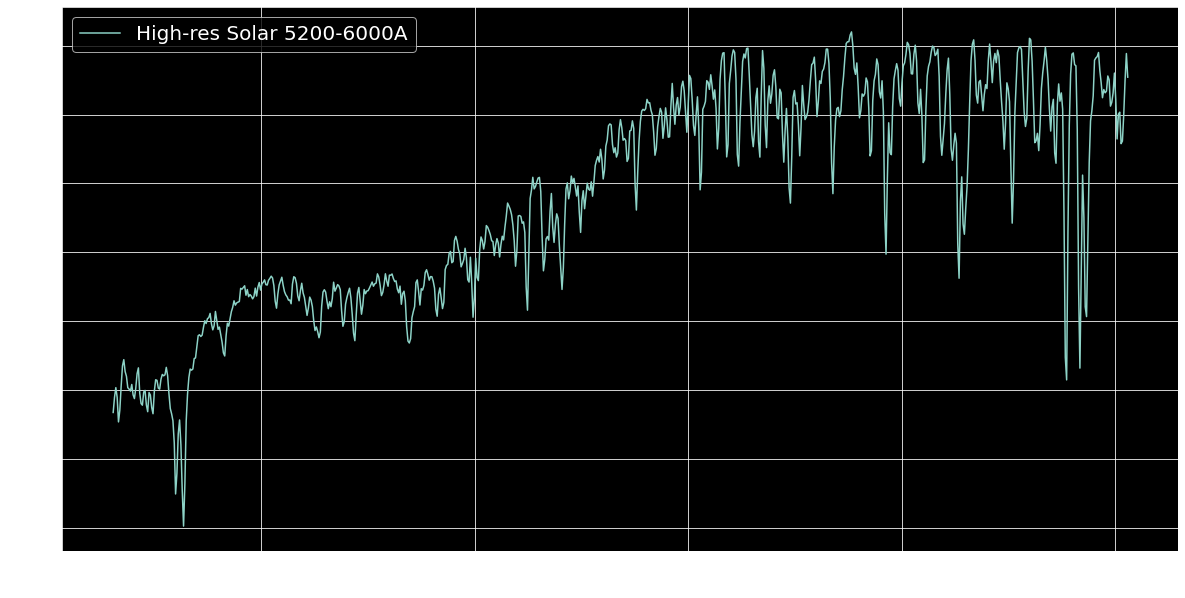

<Figure size 432x288 with 0 Axes>

In [14]:
get_peaks(HG_highres[4], sun_highres[4], "High-res HG 5200-6000A",
          "High-res Solar 5200-6000A", 5200, 6000)

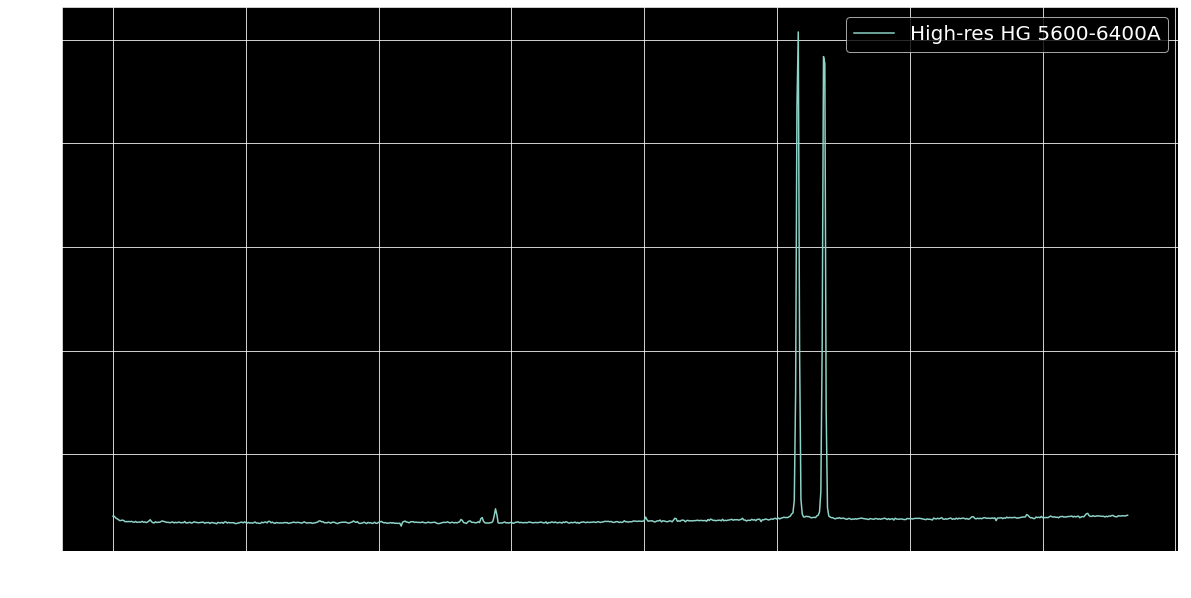

[Sun, 04 Jun 2023 21:25:34] INFO [calibrator.py:997] num_pix is set to 765.
[Sun, 04 Jun 2023 21:25:34] INFO [calibrator.py:1012] pixel_list is set to None.
[Sun, 04 Jun 2023 21:25:34] INFO [calibrator.py:1045] Plotting with matplotlib.
[Sun, 04 Jun 2023 21:25:34] WARNING [calibrator.py:1428] Using add_atlas is now deprecated. Please use the new Atlas class.


  0%|          | 0/500 [00:00<?, ?it/s]

[Sun, 04 Jun 2023 21:25:38] INFO [calibrator.py:803] Found: 13
[Sun, 04 Jun 2023 21:25:38] INFO [plotting.py:845] Peak at: 5353.951900926523 A
[Sun, 04 Jun 2023 21:25:38] INFO [plotting.py:849] - matched to 5353.951900926523 A
[Sun, 04 Jun 2023 21:25:39] INFO [plotting.py:845] Peak at: 5365.415674300539 A
[Sun, 04 Jun 2023 21:25:39] INFO [plotting.py:849] - matched to 5365.415674300539 A
[Sun, 04 Jun 2023 21:25:39] INFO [plotting.py:845] Peak at: 5384.5432898520085 A
[Sun, 04 Jun 2023 21:25:39] INFO [plotting.py:849] - matched to 5384.5432898520085 A
[Sun, 04 Jun 2023 21:25:39] INFO [plotting.py:845] Peak at: 5460.66635219259 A
[Sun, 04 Jun 2023 21:25:39] INFO [plotting.py:849] - matched to 5460.66635219259 A
[Sun, 04 Jun 2023 21:25:39] INFO [plotting.py:845] Peak at: 5549.548803884109 A
[Sun, 04 Jun 2023 21:25:39] INFO [plotting.py:849] - matched to 5549.548803884109 A
[Sun, 04 Jun 2023 21:25:39] INFO [plotting.py:845] Peak at: 5675.718217297454 A
[Sun, 04 Jun 2023 21:25:39] INFO [plo

fit coefficients =  [5.32736521e+03 8.25205920e-01]
spectrum shape =  (765,)


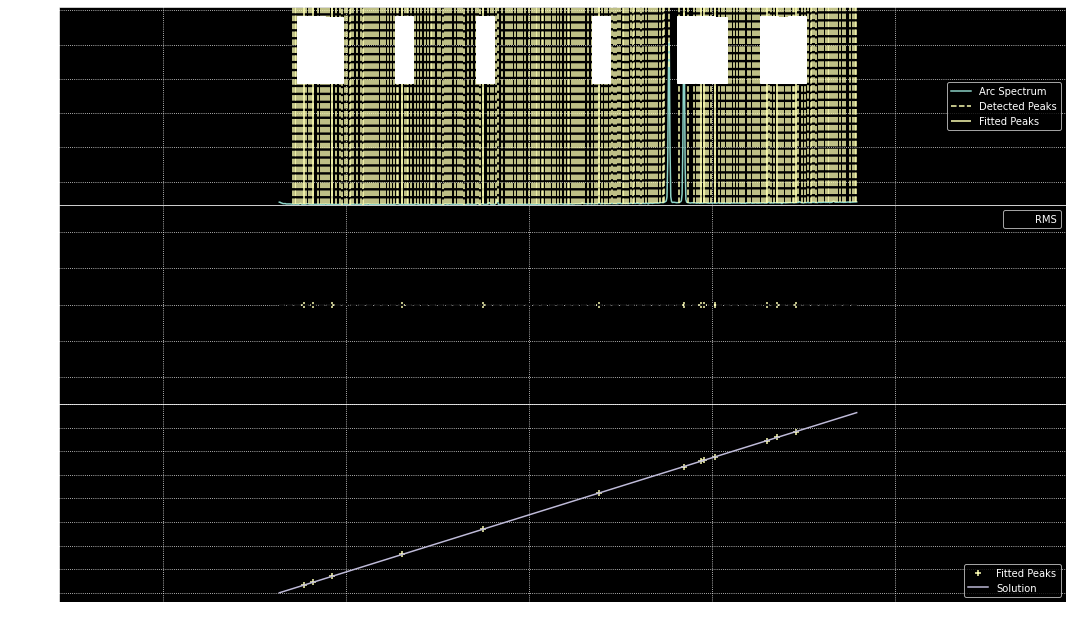

<Figure size 432x288 with 0 Axes>

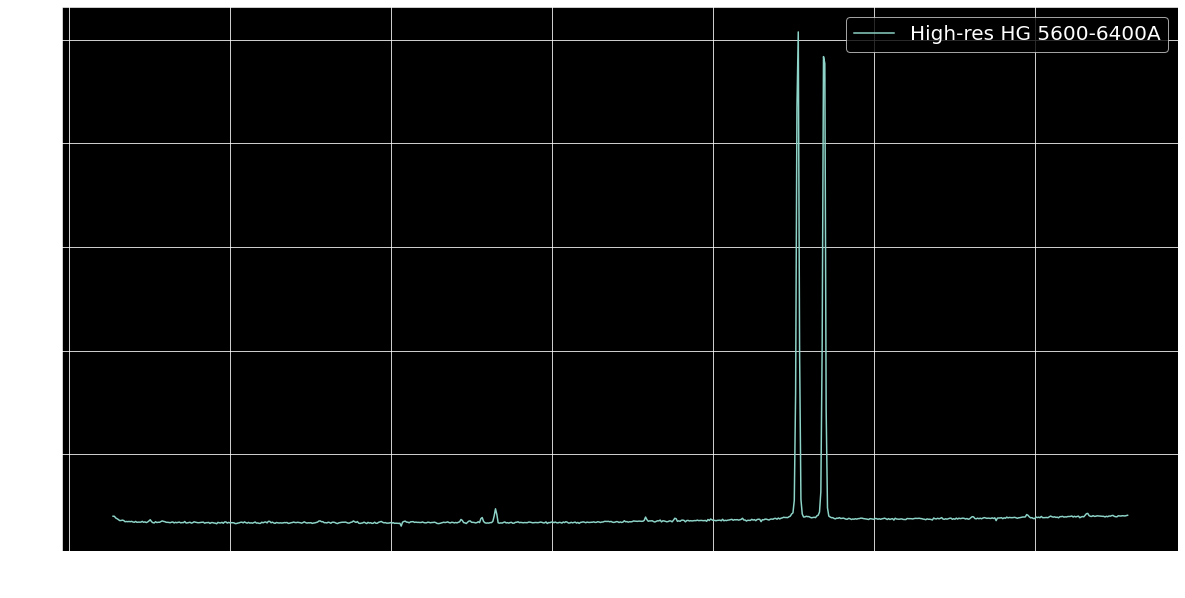

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

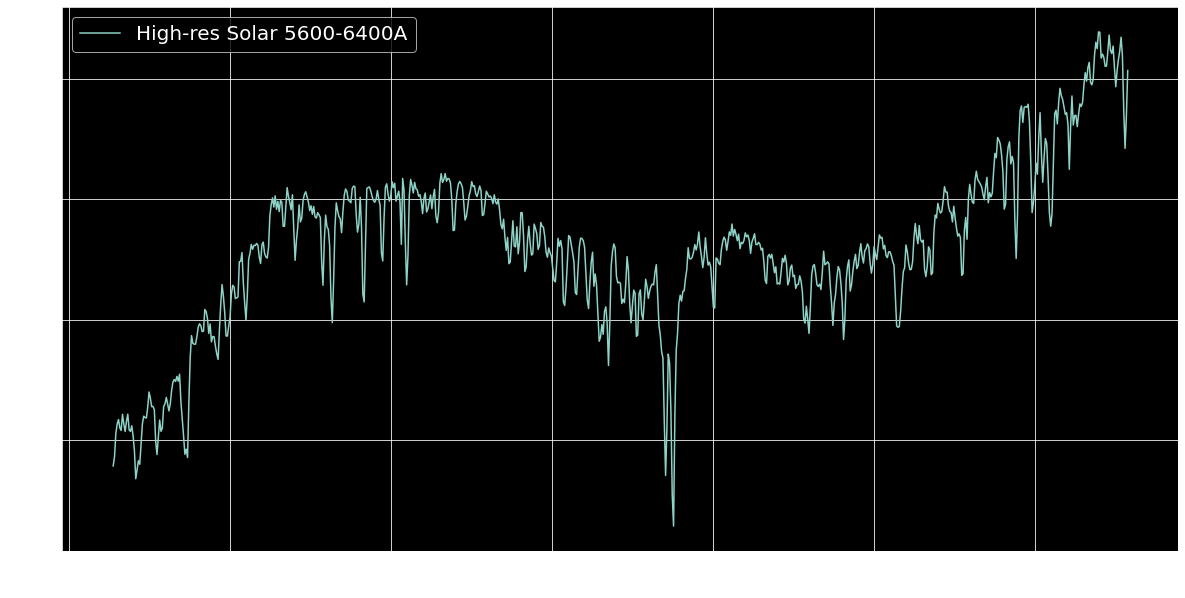

<Figure size 432x288 with 0 Axes>

In [15]:
get_peaks(HG_highres[5], sun_highres[5], "High-res HG 5600-6400A",
          "High-res Solar 5600-6400A", 5600, 6400)

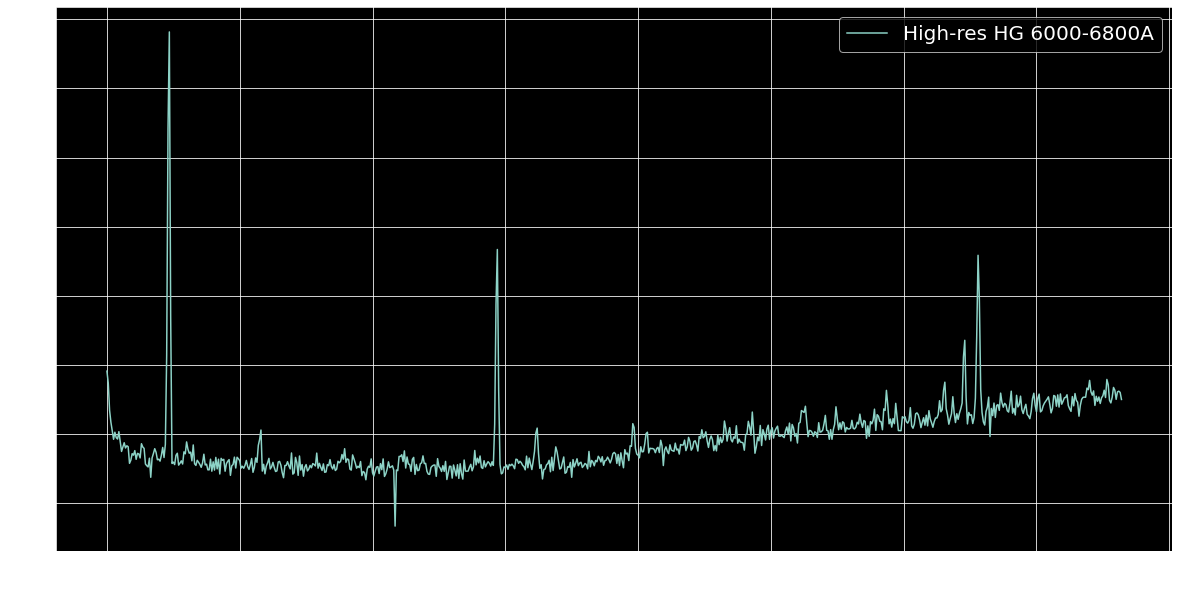

[Sun, 04 Jun 2023 21:25:40] INFO [calibrator.py:997] num_pix is set to 765.
[Sun, 04 Jun 2023 21:25:40] INFO [calibrator.py:1012] pixel_list is set to None.
[Sun, 04 Jun 2023 21:25:40] INFO [calibrator.py:1045] Plotting with matplotlib.
[Sun, 04 Jun 2023 21:25:40] WARNING [calibrator.py:1428] Using add_atlas is now deprecated. Please use the new Atlas class.


  0%|          | 0/500 [00:00<?, ?it/s]

[Sun, 04 Jun 2023 21:25:43] INFO [calibrator.py:803] Found: 7
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:845] Peak at: 5769.521837944383 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:849] - matched to 5769.521837944383 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:845] Peak at: 5789.606066177104 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:849] - matched to 5789.606066177104 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:845] Peak at: 5790.581490698007 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:849] - matched to 5790.581490698007 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:845] Peak at: 5803.693087545013 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:849] - matched to 5803.693087545013 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:845] Peak at: 5859.1644169341325 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:849] - matched to 5859.1644169341325 A
[Sun, 04 Jun 2023 21:25:43] INFO [plotting.py:845] Peak at: 5871.884822608193 A
[Sun, 04 Jun 2023 21:25:43] INFO [pl

fit coefficients =  [5.76513457e+03 2.03533730e-01]
spectrum shape =  (765,)


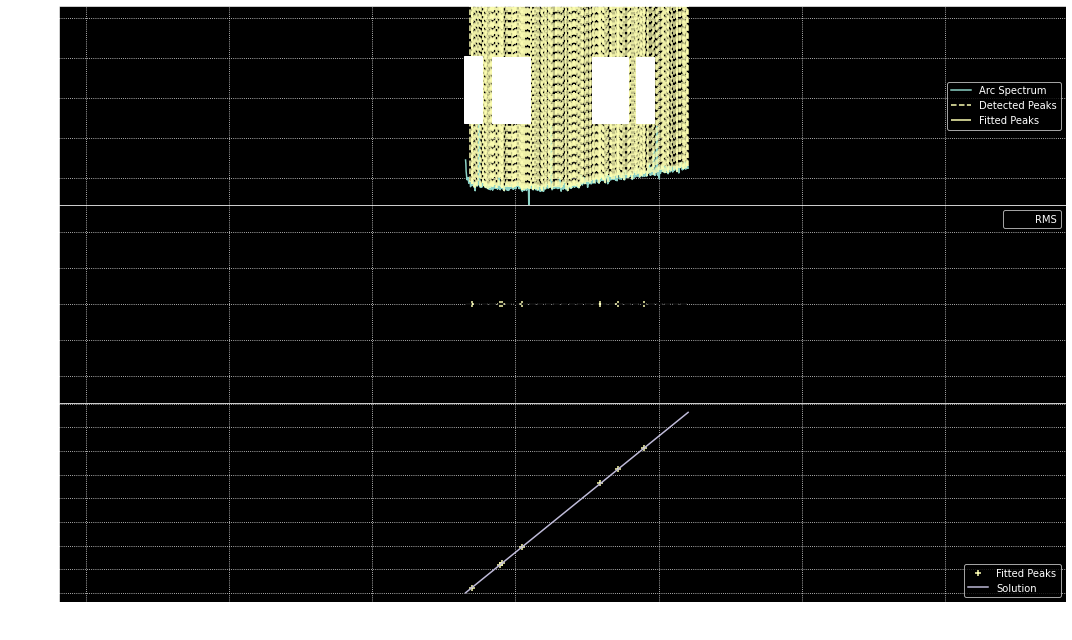

<Figure size 432x288 with 0 Axes>

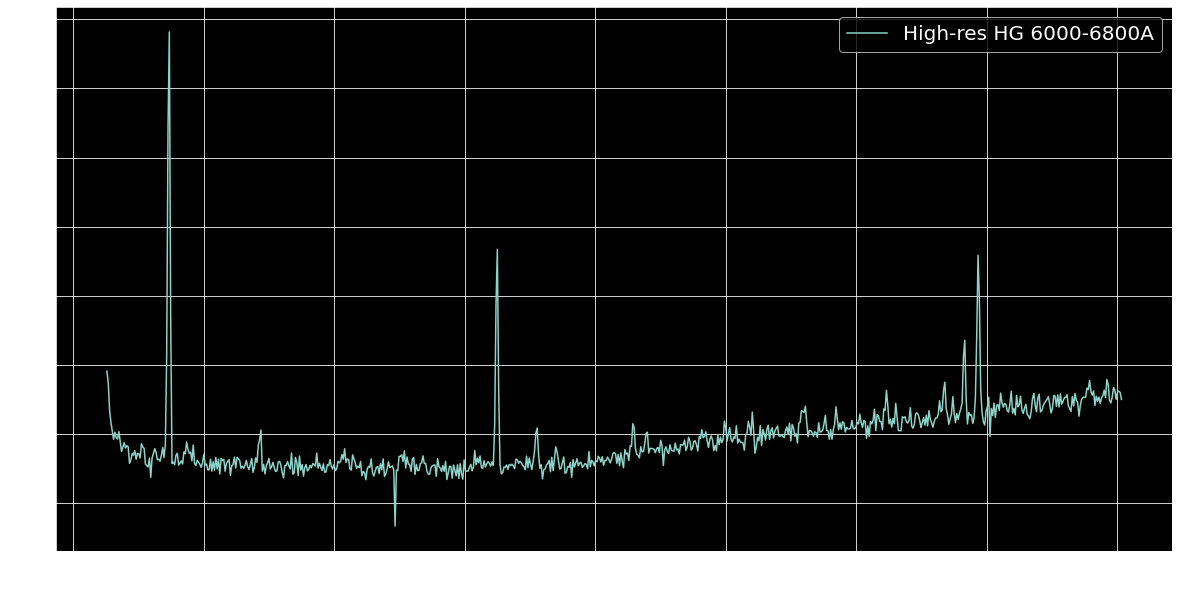

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

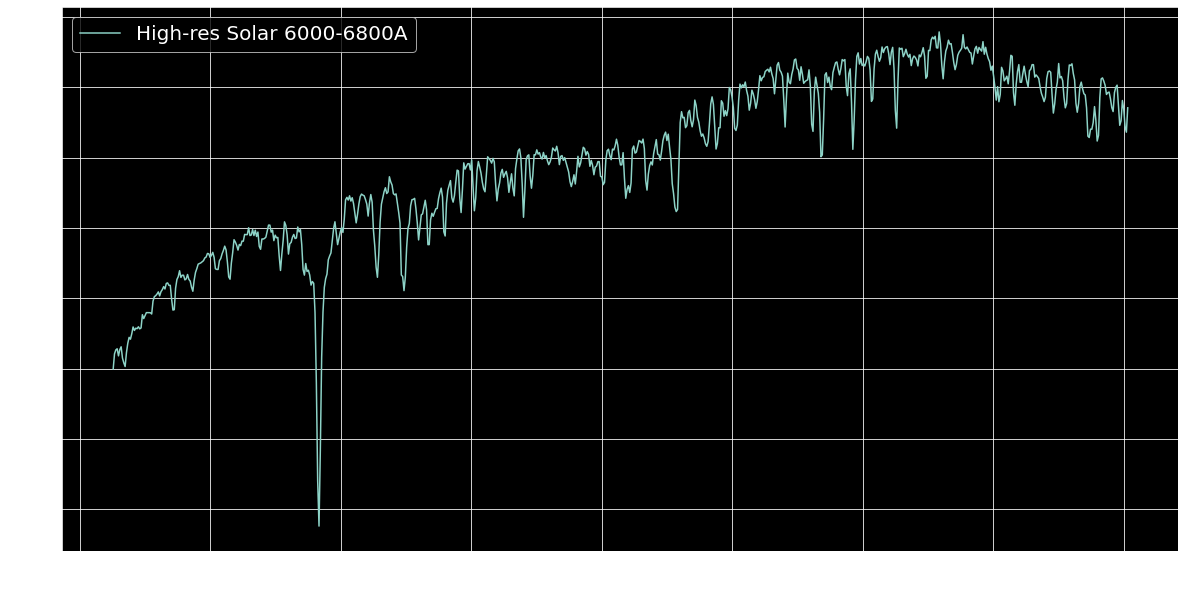

<Figure size 432x288 with 0 Axes>

In [16]:
get_peaks(HG_highres[6], sun_highres[6], "High-res HG 6000-6800A",
          "High-res Solar 6000-6800A", 6000, 6800)

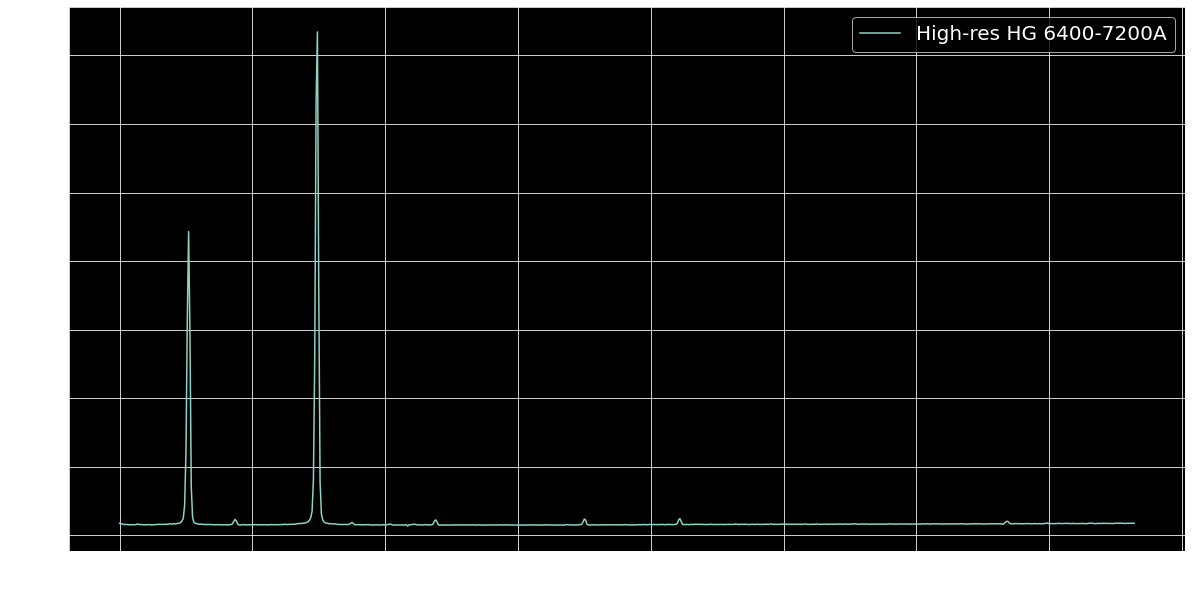

[Sun, 04 Jun 2023 21:25:45] INFO [calibrator.py:997] num_pix is set to 765.
[Sun, 04 Jun 2023 21:25:45] INFO [calibrator.py:1012] pixel_list is set to None.
[Sun, 04 Jun 2023 21:25:45] INFO [calibrator.py:1045] Plotting with matplotlib.
[Sun, 04 Jun 2023 21:25:45] WARNING [calibrator.py:1428] Using add_atlas is now deprecated. Please use the new Atlas class.


  0%|          | 0/500 [00:00<?, ?it/s]

[Sun, 04 Jun 2023 21:25:46] INFO [calibrator.py:803] Found: 5
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:845] Peak at: 6716.233656969243 A
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:849] - matched to 6716.233656969243 A
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:845] Peak at: 6907.359386436578 A
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:849] - matched to 6907.359386436578 A
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:845] Peak at: 7081.793820380992 A
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:849] - matched to 7081.793820380992 A
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:845] Peak at: 7091.751989786034 A
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:849] - matched to 7091.751989786034 A
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:845] Peak at: 7177.712551521114 A
[Sun, 04 Jun 2023 21:25:47] INFO [plotting.py:849] - matched to 7177.712551521114 A


fit coefficients =  [6.70702466e+03 6.43458694e-01]
spectrum shape =  (765,)


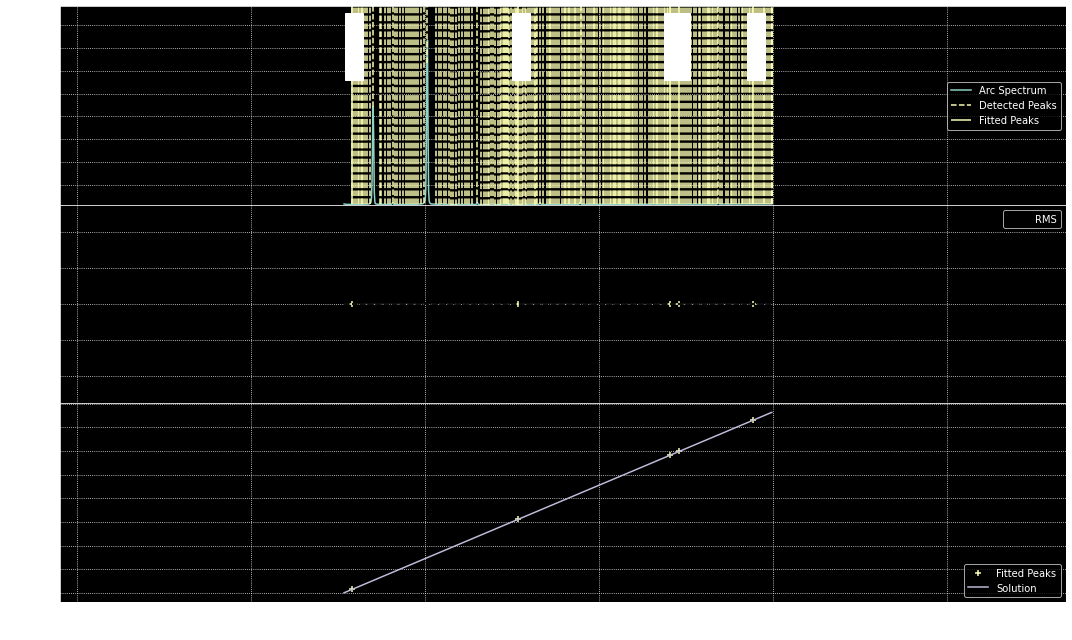

<Figure size 432x288 with 0 Axes>

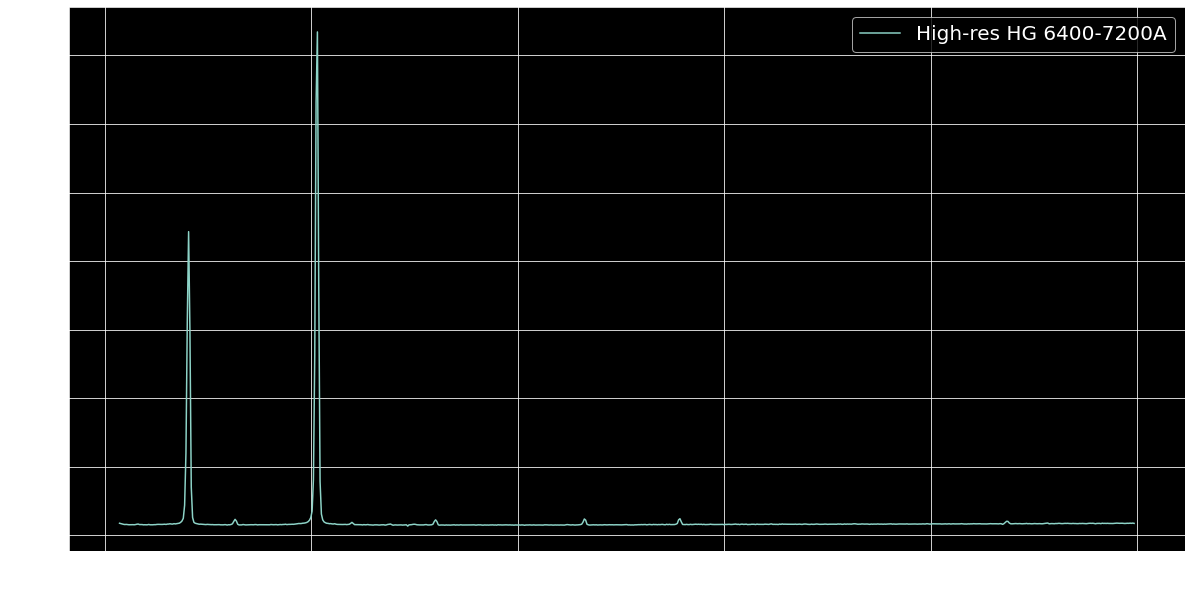

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

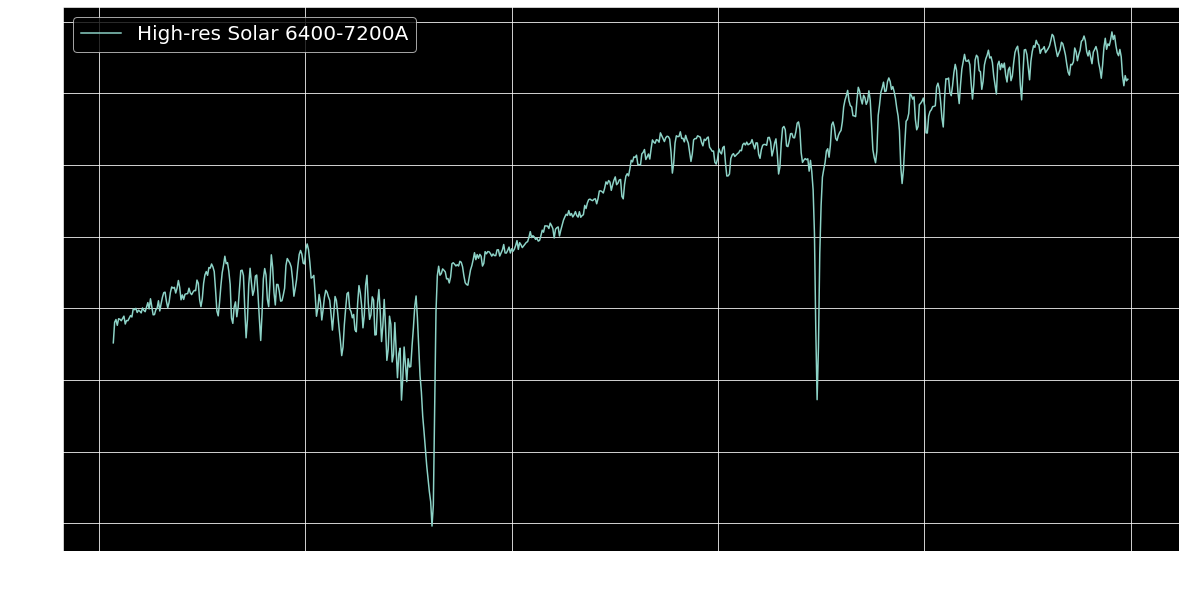

<Figure size 432x288 with 0 Axes>

In [17]:
get_peaks(HG_highres[7], sun_highres[7], "High-res HG 6400-7200A",
          "High-res Solar 6400-7200A", 6400, 7200)